## Libraries

Do not import any additional libraries

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import torch.nn.functional as F

## Download dataset and create a data loader
PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.

PyTorch offers domain-specific libraries such as [TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and [TorchAudio](https://pytorch.org/audio/stable/index.html),
all of which include datasets. For this assignment, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like
CIFAR, COCO, MNIST ([full list here](https://pytorch.org/vision/stable/datasets.html)). In this tutorial, we
use the CIFAR10 dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and
``target_transform`` to modify the samples and labels respectively.

Pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element
in the dataloader iterable will return a batch of 64 features and labels.

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

#download training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

#download test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 35548923.70it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Creating Models
To define a neural network in PyTorch, we create a class that inherits
from [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). We define the layers of the network
in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate
operations in the neural network, we move it to the GPU if available.



In [76]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, padding='same')
        self.conv2 = nn.Conv2d(16, 32, 5, padding='same')
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*8*8,512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), 1)
        return x

model = CNN().to(device)
print(model)

Using cpu device
CNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


## **Part 1**

In [28]:
#Part 1

# Class to create a dense neural network with 0 hidden layers
class dense_0(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(3*32*32, 512)
    

  def forward(self, x):
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = F.log_softmax(x, 1)
    return x

# Class to create a dense neural network with 1 hidden layer
class dense_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(x, dim=1)
        return x

# Class to create a dense neural network with 2 hidden layers
class dense_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x, dim=1)
        return x

# Class to create a dense neural network with 3 hidden layers
class dense_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(x, dim=1)
        return x

model_0 = dense_0().to(device)
model_1 = dense_1().to(device)
model_2 = dense_2().to(device)
model_3 = dense_3().to(device)




## **Part 2**

In [56]:
#Part 2
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, padding='same')
        self.conv2 = nn.Conv2d(16, 32, 5, padding='same')
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*8*8,512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.torch.sigmoid(self.conv1(x))
        x = self.pool(x)

        x = F.torch.sigmoid(self.conv2(x))
        x = self.pool(x)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.torch.sigmoid(self.fc1(x))
        x = F.log_softmax(self.fc2(x), 1)
        return x

model_sigmoid = CNN().to(device)
print(model_sigmoid)

Using cpu device
CNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


## **Part 3**

In [63]:
#Part 3
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5, padding='same')
        self.conv2 = nn.Conv2d(16, 32, 5, padding='same')
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(p=0.25)
        self.fc1 = nn.Linear(32*8*8,512)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.dropout1(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.log_softmax(self.fc2(x), 1)
        return x

model_dropout = CNN().to(device)
print(model_dropout)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


## **Part 5**

In [128]:
#3*3 filters
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding='same')
        self.conv2 = nn.Conv2d(16, 16, 3, padding='same')
        self.conv3 = nn.Conv2d(16, 32, 3, padding='same')
        self.conv4 = nn.Conv2d(32, 32, 3, padding='same')
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*8*8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), 1)
        return x

model_3times3 = CNN().to(device)
print(model_3times3)

Using cpu device
CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


## Optimizing the Model Parameters
To train a model, we need a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
and an [optimizer](https://pytorch.org/docs/stable/optim.html).



In [97]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer
optimizer = torch.optim.Adam(model_3.parameters())

## **Part 1 Optimizer**

In [29]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer layer 0
optimizer = torch.optim.Adam(model_0.parameters())

In [33]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer layer 1
optimizer = torch.optim.Adam(model_1.parameters())

In [35]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer layer 2
optimizer = torch.optim.Adam(model_2.parameters())

In [40]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer layer 3
optimizer = torch.optim.Adam(model_3.parameters())

## **Part 2 Optimizer**

In [58]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer sigmoid
optimizer = torch.optim.Adam(model_sigmoid.parameters())

## **Part 3 Optimizer**

In [65]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer dropout
optimizer = torch.optim.Adam(model_dropout.parameters())

## **Part 4 Optimizer**

In [77]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer
optimizer = torch.optim.Adam(model.parameters())

In [78]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#SGD optimizer
optimizer_SGD = torch.optim.SGD(model.parameters(), lr=0.001)

In [83]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#RMSprop optimizer
optimizer_RMS = torch.optim.RMSprop(model.parameters(), lr=0.0001)

In [87]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adagrad optimizer
optimizer_ADA = torch.optim.Adagrad(model.parameters())

## **Part 5 optimizer**

In [129]:
#negative log likelihood loss
loss_fn = nn.NLLLoss()

#Adam optimizer
optimizer = torch.optim.Adam(model_3times3.parameters())

## Training function

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and
backpropagates the prediction error to adjust the model's parameters.

In [130]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    average_train_loss = train_loss / num_batches
    accuracy = correct / size
    return accuracy, average_train_loss

## **Part 4 training functions**

In [14]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    average_train_loss = train_loss / num_batches
    accuracy = correct / size
    return accuracy, average_train_loss

In [80]:
def train(dataloader, model, loss_fn, optimizer_SGD):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer_SGD.zero_grad()
        loss.backward()
        optimizer_SGD.step()

    average_train_loss = train_loss / num_batches
    accuracy = correct / size
    return accuracy, average_train_loss

In [84]:
def train(dataloader, model, loss_fn, optimizer_RMS):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer_RMS.zero_grad()
        loss.backward()
        optimizer_RMS.step()

    average_train_loss = train_loss / num_batches
    accuracy = correct / size
    return accuracy, average_train_loss

In [88]:
def train(dataloader, model, loss_fn, optimizer_ADA):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer_ADA.zero_grad()
        loss.backward()
        optimizer_ADA.step()

    average_train_loss = train_loss / num_batches
    accuracy = correct / size
    return accuracy, average_train_loss

## Testing function

We also check the model's performance against the test dataset to ensure it is learning.



In [131]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    average_test_loss = test_loss / num_batches
    accuracy = correct / size
    return accuracy, average_test_loss

## Training process

The training process is conducted over several iterations (*epochs*). During each epoch, the model learns
parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.



In [74]:
#CNN
epochs = 10
all_train_accuracies = []
all_test_accuracies = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model, loss_fn, optimizer)
    all_train_accuracies += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model, loss_fn)
    all_test_accuracies += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:40<06:01, 40.12s/it]

Epoch 1:	 Train accuracy: 49.8%	 Avg train loss: 1.392582	 Test accuracy: 58.8%	 Avg test loss: 1.143121


 20%|██        | 2/10 [01:20<05:20, 40.06s/it]

Epoch 2:	 Train accuracy: 63.8%	 Avg train loss: 1.022187	 Test accuracy: 66.3%	 Avg test loss: 0.958459


 30%|███       | 3/10 [02:00<04:40, 40.06s/it]

Epoch 3:	 Train accuracy: 70.8%	 Avg train loss: 0.825531	 Test accuracy: 68.3%	 Avg test loss: 0.904883


 40%|████      | 4/10 [02:40<04:00, 40.05s/it]

Epoch 4:	 Train accuracy: 76.6%	 Avg train loss: 0.668433	 Test accuracy: 69.4%	 Avg test loss: 0.906972


 50%|█████     | 5/10 [03:20<03:21, 40.26s/it]

Epoch 5:	 Train accuracy: 81.5%	 Avg train loss: 0.528060	 Test accuracy: 71.1%	 Avg test loss: 0.864392


 60%|██████    | 6/10 [04:01<02:40, 40.24s/it]

Epoch 6:	 Train accuracy: 86.2%	 Avg train loss: 0.391941	 Test accuracy: 70.5%	 Avg test loss: 0.986633


 70%|███████   | 7/10 [04:41<02:01, 40.37s/it]

Epoch 7:	 Train accuracy: 90.5%	 Avg train loss: 0.273652	 Test accuracy: 71.0%	 Avg test loss: 1.067774


 80%|████████  | 8/10 [05:22<01:20, 40.37s/it]

Epoch 8:	 Train accuracy: 93.9%	 Avg train loss: 0.180068	 Test accuracy: 70.4%	 Avg test loss: 1.282722


 90%|█████████ | 9/10 [06:02<00:40, 40.32s/it]

Epoch 9:	 Train accuracy: 95.7%	 Avg train loss: 0.127921	 Test accuracy: 69.8%	 Avg test loss: 1.423278


100%|██████████| 10/10 [06:42<00:00, 40.21s/it]

Epoch 10:	 Train accuracy: 96.6%	 Avg train loss: 0.099004	 Test accuracy: 70.2%	 Avg test loss: 1.588676


## **Part 1 training process**

In [32]:
#Layer 0
epochs = 10
all_train_accuracies_layer0 = []
all_test_accuracies_layer0 = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model_0, loss_fn, optimizer)
    all_train_accuracies_layer0 += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model_0, loss_fn)
    all_test_accuracies_layer0 += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:27<04:08, 27.66s/it]

Epoch 1:	 Train accuracy: 35.8%	 Avg train loss: 2.954102	 Test accuracy: 37.1%	 Avg test loss: 2.724026


 20%|██        | 2/10 [00:54<03:37, 27.21s/it]

Epoch 2:	 Train accuracy: 38.8%	 Avg train loss: 2.655727	 Test accuracy: 38.1%	 Avg test loss: 2.611544


 30%|███       | 3/10 [01:20<03:06, 26.66s/it]

Epoch 3:	 Train accuracy: 39.7%	 Avg train loss: 2.543024	 Test accuracy: 39.0%	 Avg test loss: 2.541068


 40%|████      | 4/10 [01:46<02:37, 26.26s/it]

Epoch 4:	 Train accuracy: 40.2%	 Avg train loss: 2.454793	 Test accuracy: 39.0%	 Avg test loss: 2.479980


 50%|█████     | 5/10 [02:12<02:11, 26.40s/it]

Epoch 5:	 Train accuracy: 40.4%	 Avg train loss: 2.371834	 Test accuracy: 37.3%	 Avg test loss: 2.447397


 60%|██████    | 6/10 [02:39<01:45, 26.40s/it]

Epoch 6:	 Train accuracy: 41.0%	 Avg train loss: 2.294031	 Test accuracy: 37.8%	 Avg test loss: 2.346148


 70%|███████   | 7/10 [03:06<01:19, 26.58s/it]

Epoch 7:	 Train accuracy: 41.0%	 Avg train loss: 2.220034	 Test accuracy: 38.2%	 Avg test loss: 2.306707


 80%|████████  | 8/10 [03:32<00:53, 26.59s/it]

Epoch 8:	 Train accuracy: 41.2%	 Avg train loss: 2.149907	 Test accuracy: 37.2%	 Avg test loss: 2.283144


 90%|█████████ | 9/10 [03:59<00:26, 26.60s/it]

Epoch 9:	 Train accuracy: 41.4%	 Avg train loss: 2.082940	 Test accuracy: 37.7%	 Avg test loss: 2.213639


100%|██████████| 10/10 [04:26<00:00, 26.61s/it]

Epoch 10:	 Train accuracy: 41.5%	 Avg train loss: 2.028960	 Test accuracy: 38.2%	 Avg test loss: 2.152366


In [34]:
#Layer 1
epochs = 10
all_train_accuracies_layer1 = []
all_test_accuracies_layer1 = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model_1, loss_fn, optimizer)
    all_train_accuracies_layer1 += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model_1, loss_fn)
    all_test_accuracies_layer1 += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:26<04:01, 26.85s/it]

Epoch 1:	 Train accuracy: 39.9%	 Avg train loss: 1.764273	 Test accuracy: 44.8%	 Avg test loss: 1.614236


 20%|██        | 2/10 [00:53<03:34, 26.87s/it]

Epoch 2:	 Train accuracy: 47.7%	 Avg train loss: 1.526977	 Test accuracy: 48.4%	 Avg test loss: 1.509878


 30%|███       | 3/10 [01:20<03:08, 26.86s/it]

Epoch 3:	 Train accuracy: 51.6%	 Avg train loss: 1.433272	 Test accuracy: 48.9%	 Avg test loss: 1.547909


 40%|████      | 4/10 [01:47<02:41, 26.95s/it]

Epoch 4:	 Train accuracy: 54.1%	 Avg train loss: 1.363059	 Test accuracy: 49.8%	 Avg test loss: 1.505242


 50%|█████     | 5/10 [02:14<02:14, 26.85s/it]

Epoch 5:	 Train accuracy: 56.5%	 Avg train loss: 1.301951	 Test accuracy: 51.3%	 Avg test loss: 1.495026


 60%|██████    | 6/10 [02:41<01:47, 26.88s/it]

Epoch 6:	 Train accuracy: 58.6%	 Avg train loss: 1.242916	 Test accuracy: 49.9%	 Avg test loss: 1.563152


 70%|███████   | 7/10 [03:08<01:20, 26.86s/it]

Epoch 7:	 Train accuracy: 60.6%	 Avg train loss: 1.193075	 Test accuracy: 51.6%	 Avg test loss: 1.520380


 80%|████████  | 8/10 [03:34<00:53, 26.85s/it]

Epoch 8:	 Train accuracy: 62.4%	 Avg train loss: 1.136187	 Test accuracy: 49.8%	 Avg test loss: 1.588568


 90%|█████████ | 9/10 [04:01<00:26, 26.89s/it]

Epoch 9:	 Train accuracy: 64.3%	 Avg train loss: 1.091964	 Test accuracy: 50.4%	 Avg test loss: 1.613262


100%|██████████| 10/10 [04:28<00:00, 26.86s/it]

Epoch 10:	 Train accuracy: 66.0%	 Avg train loss: 1.047355	 Test accuracy: 51.8%	 Avg test loss: 1.571291


In [39]:
#Layer 2
epochs = 10
all_train_accuracies_layer2 = []
all_test_accuracies_layer2 = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model_2, loss_fn, optimizer)
    all_train_accuracies_layer2 += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model_2, loss_fn)
    all_test_accuracies_layer2 += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:29<04:23, 29.29s/it]

Epoch 1:	 Train accuracy: 20.5%	 Avg train loss: 2.098986	 Test accuracy: 25.2%	 Avg test loss: 2.000673


 20%|██        | 2/10 [00:58<03:53, 29.16s/it]

Epoch 2:	 Train accuracy: 25.7%	 Avg train loss: 1.978262	 Test accuracy: 26.8%	 Avg test loss: 1.962058


 30%|███       | 3/10 [01:27<03:24, 29.20s/it]

Epoch 3:	 Train accuracy: 27.7%	 Avg train loss: 1.920513	 Test accuracy: 26.9%	 Avg test loss: 1.952025


 40%|████      | 4/10 [01:56<02:54, 29.05s/it]

Epoch 4:	 Train accuracy: 28.8%	 Avg train loss: 1.879745	 Test accuracy: 27.0%	 Avg test loss: 1.943465


 50%|█████     | 5/10 [02:25<02:24, 28.97s/it]

Epoch 5:	 Train accuracy: 29.9%	 Avg train loss: 1.841630	 Test accuracy: 27.5%	 Avg test loss: 1.932109


 60%|██████    | 6/10 [02:54<01:56, 29.05s/it]

Epoch 6:	 Train accuracy: 32.2%	 Avg train loss: 1.796367	 Test accuracy: 31.8%	 Avg test loss: 1.915077


 70%|███████   | 7/10 [03:23<01:27, 29.10s/it]

Epoch 7:	 Train accuracy: 36.5%	 Avg train loss: 1.736802	 Test accuracy: 32.8%	 Avg test loss: 1.912701


 80%|████████  | 8/10 [03:53<00:58, 29.25s/it]

Epoch 8:	 Train accuracy: 38.5%	 Avg train loss: 1.683185	 Test accuracy: 33.0%	 Avg test loss: 1.936900


 90%|█████████ | 9/10 [04:22<00:29, 29.14s/it]

Epoch 9:	 Train accuracy: 40.7%	 Avg train loss: 1.635192	 Test accuracy: 34.8%	 Avg test loss: 1.892330


100%|██████████| 10/10 [04:51<00:00, 29.14s/it]

Epoch 10:	 Train accuracy: 42.3%	 Avg train loss: 1.587681	 Test accuracy: 34.9%	 Avg test loss: 1.894283


In [43]:
#Layer 3
epochs = 10
all_train_accuracies_layer3 = []
all_test_accuracies_layer3 = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model_3, loss_fn, optimizer)
    all_train_accuracies_layer3 += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model_3, loss_fn)
    all_test_accuracies_layer3 += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:31<04:45, 31.73s/it]

Epoch 1:	 Train accuracy: 38.4%	 Avg train loss: 1.815776	 Test accuracy: 44.6%	 Avg test loss: 1.625426


 20%|██        | 2/10 [01:03<04:12, 31.61s/it]

Epoch 2:	 Train accuracy: 46.4%	 Avg train loss: 1.576670	 Test accuracy: 46.8%	 Avg test loss: 1.593391


 30%|███       | 3/10 [01:34<03:40, 31.54s/it]

Epoch 3:	 Train accuracy: 50.4%	 Avg train loss: 1.466383	 Test accuracy: 47.8%	 Avg test loss: 1.551278


 40%|████      | 4/10 [02:06<03:09, 31.57s/it]

Epoch 4:	 Train accuracy: 53.1%	 Avg train loss: 1.380020	 Test accuracy: 49.7%	 Avg test loss: 1.494132


 50%|█████     | 5/10 [02:37<02:37, 31.52s/it]

Epoch 5:	 Train accuracy: 55.7%	 Avg train loss: 1.305460	 Test accuracy: 49.5%	 Avg test loss: 1.510039


 60%|██████    | 6/10 [03:09<02:05, 31.43s/it]

Epoch 6:	 Train accuracy: 59.3%	 Avg train loss: 1.191862	 Test accuracy: 52.6%	 Avg test loss: 1.401998


 70%|███████   | 7/10 [03:40<01:34, 31.55s/it]

Epoch 7:	 Train accuracy: 63.4%	 Avg train loss: 1.050935	 Test accuracy: 53.6%	 Avg test loss: 1.421676


 80%|████████  | 8/10 [04:12<01:03, 31.63s/it]

Epoch 8:	 Train accuracy: 66.0%	 Avg train loss: 0.969468	 Test accuracy: 53.3%	 Avg test loss: 1.449749


 90%|█████████ | 9/10 [04:44<00:31, 31.68s/it]

Epoch 9:	 Train accuracy: 68.8%	 Avg train loss: 0.888964	 Test accuracy: 54.6%	 Avg test loss: 1.451332


100%|██████████| 10/10 [05:15<00:00, 31.60s/it]

Epoch 10:	 Train accuracy: 71.2%	 Avg train loss: 0.813482	 Test accuracy: 53.3%	 Avg test loss: 1.543714


## **Part 2 training process**

In [61]:
#Sigmoid
epochs = 10
all_train_accuracies_sigmoid = []
all_test_accuracies_sigmoid = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model_sigmoid, loss_fn, optimizer)
    all_train_accuracies_sigmoid += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model_sigmoid, loss_fn)
    all_test_accuracies_sigmoid += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:42<06:21, 42.43s/it]

Epoch 1:	 Train accuracy: 30.2%	 Avg train loss: 1.908772	 Test accuracy: 41.6%	 Avg test loss: 1.625293


 20%|██        | 2/10 [01:24<05:38, 42.26s/it]

Epoch 2:	 Train accuracy: 45.7%	 Avg train loss: 1.508469	 Test accuracy: 49.8%	 Avg test loss: 1.382341


 30%|███       | 3/10 [02:07<04:56, 42.34s/it]

Epoch 3:	 Train accuracy: 52.6%	 Avg train loss: 1.316263	 Test accuracy: 54.8%	 Avg test loss: 1.252911


 40%|████      | 4/10 [02:49<04:14, 42.37s/it]

Epoch 4:	 Train accuracy: 57.5%	 Avg train loss: 1.190748	 Test accuracy: 57.0%	 Avg test loss: 1.185209


 50%|█████     | 5/10 [03:31<03:31, 42.38s/it]

Epoch 5:	 Train accuracy: 61.0%	 Avg train loss: 1.096589	 Test accuracy: 59.1%	 Avg test loss: 1.146578


 60%|██████    | 6/10 [04:19<02:56, 44.13s/it]

Epoch 6:	 Train accuracy: 64.2%	 Avg train loss: 1.006887	 Test accuracy: 60.8%	 Avg test loss: 1.114696


 70%|███████   | 7/10 [05:14<02:23, 47.84s/it]

Epoch 7:	 Train accuracy: 67.2%	 Avg train loss: 0.926766	 Test accuracy: 63.2%	 Avg test loss: 1.038323


 80%|████████  | 8/10 [06:02<01:35, 47.80s/it]

Epoch 8:	 Train accuracy: 70.3%	 Avg train loss: 0.847436	 Test accuracy: 63.3%	 Avg test loss: 1.043813


 90%|█████████ | 9/10 [06:46<00:46, 46.70s/it]

Epoch 9:	 Train accuracy: 73.0%	 Avg train loss: 0.773258	 Test accuracy: 64.5%	 Avg test loss: 1.015095


100%|██████████| 10/10 [07:29<00:00, 44.93s/it]

Epoch 10:	 Train accuracy: 75.8%	 Avg train loss: 0.696856	 Test accuracy: 65.4%	 Avg test loss: 0.995650


## **Part 3 training process**

In [68]:
#Dropout
epochs = 20
all_train_accuracies_dropout = []
all_test_accuracies_dropout = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model_dropout, loss_fn, optimizer)
    all_train_accuracies_dropout += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model_dropout, loss_fn)
    all_test_accuracies_dropout += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

  5%|▌         | 1/20 [00:45<14:19, 45.24s/it]

Epoch 1:	 Train accuracy: 44.9%	 Avg train loss: 1.525690	 Test accuracy: 57.4%	 Avg test loss: 1.184874


 10%|█         | 2/20 [01:30<13:34, 45.23s/it]

Epoch 2:	 Train accuracy: 57.4%	 Avg train loss: 1.204690	 Test accuracy: 64.2%	 Avg test loss: 1.028187


 15%|█▌        | 3/20 [02:15<12:45, 45.02s/it]

Epoch 3:	 Train accuracy: 61.9%	 Avg train loss: 1.083198	 Test accuracy: 66.8%	 Avg test loss: 0.941173


 20%|██        | 4/20 [03:00<12:02, 45.18s/it]

Epoch 4:	 Train accuracy: 64.7%	 Avg train loss: 1.001809	 Test accuracy: 68.7%	 Avg test loss: 0.908513


 25%|██▌       | 5/20 [03:45<11:16, 45.07s/it]

Epoch 5:	 Train accuracy: 66.8%	 Avg train loss: 0.943369	 Test accuracy: 70.2%	 Avg test loss: 0.857376


 30%|███       | 6/20 [04:30<10:30, 45.02s/it]

Epoch 6:	 Train accuracy: 68.6%	 Avg train loss: 0.893134	 Test accuracy: 69.8%	 Avg test loss: 0.865973


 35%|███▌      | 7/20 [05:15<09:45, 45.01s/it]

Epoch 7:	 Train accuracy: 69.9%	 Avg train loss: 0.857385	 Test accuracy: 70.1%	 Avg test loss: 0.855862


 40%|████      | 8/20 [06:00<09:01, 45.11s/it]

Epoch 8:	 Train accuracy: 70.9%	 Avg train loss: 0.834077	 Test accuracy: 72.0%	 Avg test loss: 0.802411


 45%|████▌     | 9/20 [06:45<08:16, 45.11s/it]

Epoch 9:	 Train accuracy: 71.7%	 Avg train loss: 0.803496	 Test accuracy: 72.7%	 Avg test loss: 0.800683


 50%|█████     | 10/20 [07:30<07:30, 45.01s/it]

Epoch 10:	 Train accuracy: 72.8%	 Avg train loss: 0.776567	 Test accuracy: 73.8%	 Avg test loss: 0.758061


 55%|█████▌    | 11/20 [08:16<06:45, 45.11s/it]

Epoch 11:	 Train accuracy: 73.2%	 Avg train loss: 0.760537	 Test accuracy: 72.8%	 Avg test loss: 0.781502


 60%|██████    | 12/20 [09:00<06:00, 45.04s/it]

Epoch 12:	 Train accuracy: 74.0%	 Avg train loss: 0.741525	 Test accuracy: 73.8%	 Avg test loss: 0.765522


 65%|██████▌   | 13/20 [09:45<05:15, 45.04s/it]

Epoch 13:	 Train accuracy: 74.2%	 Avg train loss: 0.724787	 Test accuracy: 74.3%	 Avg test loss: 0.749736


 70%|███████   | 14/20 [10:30<04:30, 45.05s/it]

Epoch 14:	 Train accuracy: 74.8%	 Avg train loss: 0.716051	 Test accuracy: 74.4%	 Avg test loss: 0.740074


 75%|███████▌  | 15/20 [11:15<03:44, 44.98s/it]

Epoch 15:	 Train accuracy: 75.5%	 Avg train loss: 0.691333	 Test accuracy: 74.5%	 Avg test loss: 0.744694


 80%|████████  | 16/20 [12:01<03:00, 45.13s/it]

Epoch 16:	 Train accuracy: 75.8%	 Avg train loss: 0.685381	 Test accuracy: 74.4%	 Avg test loss: 0.752006


 85%|████████▌ | 17/20 [12:46<02:15, 45.11s/it]

Epoch 17:	 Train accuracy: 76.5%	 Avg train loss: 0.666837	 Test accuracy: 74.4%	 Avg test loss: 0.749102


 90%|█████████ | 18/20 [13:31<01:30, 45.07s/it]

Epoch 18:	 Train accuracy: 76.6%	 Avg train loss: 0.660081	 Test accuracy: 75.5%	 Avg test loss: 0.718469


 95%|█████████▌| 19/20 [14:16<00:45, 45.07s/it]

Epoch 19:	 Train accuracy: 77.1%	 Avg train loss: 0.651689	 Test accuracy: 75.0%	 Avg test loss: 0.742421


100%|██████████| 20/20 [15:01<00:00, 45.06s/it]

Epoch 20:	 Train accuracy: 77.5%	 Avg train loss: 0.638575	 Test accuracy: 75.2%	 Avg test loss: 0.729272


## **Part 4 training process**

In [19]:
#Adam
epochs = 10
all_train_accuracies_ADAM = []
all_test_accuracies_ADAM = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model, loss_fn, optimizer)
    all_train_accuracies_ADAM += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model, loss_fn)
    all_test_accuracies_ADAM += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:43<06:29, 43.28s/it]

Epoch 1:	 Train accuracy: 50.8%	 Avg train loss: 1.362228	 Test accuracy: 60.2%	 Avg test loss: 1.109109


 20%|██        | 2/10 [01:24<05:34, 41.83s/it]

Epoch 2:	 Train accuracy: 65.3%	 Avg train loss: 0.976781	 Test accuracy: 67.5%	 Avg test loss: 0.940628


 30%|███       | 3/10 [02:04<04:48, 41.20s/it]

Epoch 3:	 Train accuracy: 72.2%	 Avg train loss: 0.789950	 Test accuracy: 68.7%	 Avg test loss: 0.907576


 40%|████      | 4/10 [02:45<04:05, 40.96s/it]

Epoch 4:	 Train accuracy: 77.1%	 Avg train loss: 0.650628	 Test accuracy: 71.1%	 Avg test loss: 0.843812


 50%|█████     | 5/10 [03:25<03:24, 40.81s/it]

Epoch 5:	 Train accuracy: 81.9%	 Avg train loss: 0.515050	 Test accuracy: 71.0%	 Avg test loss: 0.861648


 60%|██████    | 6/10 [04:06<02:42, 40.73s/it]

Epoch 6:	 Train accuracy: 86.4%	 Avg train loss: 0.392546	 Test accuracy: 70.7%	 Avg test loss: 0.977886


 70%|███████   | 7/10 [04:46<02:02, 40.71s/it]

Epoch 7:	 Train accuracy: 90.6%	 Avg train loss: 0.275785	 Test accuracy: 70.5%	 Avg test loss: 1.070281


 80%|████████  | 8/10 [05:27<01:21, 40.71s/it]

Epoch 8:	 Train accuracy: 93.5%	 Avg train loss: 0.191408	 Test accuracy: 71.2%	 Avg test loss: 1.211214


 90%|█████████ | 9/10 [06:08<00:40, 40.72s/it]

Epoch 9:	 Train accuracy: 95.3%	 Avg train loss: 0.135838	 Test accuracy: 70.2%	 Avg test loss: 1.401530


100%|██████████| 10/10 [06:49<00:00, 40.92s/it]

Epoch 10:	 Train accuracy: 96.4%	 Avg train loss: 0.106800	 Test accuracy: 69.7%	 Avg test loss: 1.635115


In [82]:
#SGD
epochs = 10
all_train_accuracies_SGD = []
all_test_accuracies_SGD = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model, loss_fn, optimizer_SGD)
    all_train_accuracies_SGD += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model, loss_fn)
    all_test_accuracies_SGD += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:37<05:35, 37.29s/it]

Epoch 1:	 Train accuracy: 13.0%	 Avg train loss: 2.297855	 Test accuracy: 15.6%	 Avg test loss: 2.291933


 20%|██        | 2/10 [01:14<04:57, 37.14s/it]

Epoch 2:	 Train accuracy: 15.4%	 Avg train loss: 2.284399	 Test accuracy: 16.7%	 Avg test loss: 2.273483


 30%|███       | 3/10 [01:51<04:19, 37.07s/it]

Epoch 3:	 Train accuracy: 20.9%	 Avg train loss: 2.253687	 Test accuracy: 25.8%	 Avg test loss: 2.222509


 40%|████      | 4/10 [02:28<03:42, 37.03s/it]

Epoch 4:	 Train accuracy: 26.8%	 Avg train loss: 2.171300	 Test accuracy: 27.9%	 Avg test loss: 2.104454


 50%|█████     | 5/10 [03:05<03:05, 37.01s/it]

Epoch 5:	 Train accuracy: 28.0%	 Avg train loss: 2.053100	 Test accuracy: 30.2%	 Avg test loss: 1.991484


 60%|██████    | 6/10 [03:42<02:27, 36.99s/it]

Epoch 6:	 Train accuracy: 30.4%	 Avg train loss: 1.960259	 Test accuracy: 32.3%	 Avg test loss: 1.913521


 70%|███████   | 7/10 [04:19<01:51, 37.04s/it]

Epoch 7:	 Train accuracy: 32.4%	 Avg train loss: 1.897447	 Test accuracy: 34.1%	 Avg test loss: 1.861770


 80%|████████  | 8/10 [04:56<01:14, 37.10s/it]

Epoch 8:	 Train accuracy: 34.2%	 Avg train loss: 1.849347	 Test accuracy: 35.0%	 Avg test loss: 1.817692


 90%|█████████ | 9/10 [05:33<00:37, 37.10s/it]

Epoch 9:	 Train accuracy: 35.9%	 Avg train loss: 1.805325	 Test accuracy: 37.2%	 Avg test loss: 1.774528


100%|██████████| 10/10 [06:11<00:00, 37.10s/it]

Epoch 10:	 Train accuracy: 37.5%	 Avg train loss: 1.762366	 Test accuracy: 38.3%	 Avg test loss: 1.731710


In [86]:
#RMSprop
epochs = 10
all_train_accuracies_RMS = []
all_test_accuracies_RMS = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model, loss_fn, optimizer_RMS)
    all_train_accuracies_RMS += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model, loss_fn)
    all_test_accuracies_RMS += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:38<05:47, 38.64s/it]

Epoch 1:	 Train accuracy: 44.0%	 Avg train loss: 1.578628	 Test accuracy: 48.9%	 Avg test loss: 1.437366


 20%|██        | 2/10 [01:17<05:08, 38.59s/it]

Epoch 2:	 Train accuracy: 50.8%	 Avg train loss: 1.377112	 Test accuracy: 49.3%	 Avg test loss: 1.411443


 30%|███       | 3/10 [01:55<04:30, 38.58s/it]

Epoch 3:	 Train accuracy: 55.3%	 Avg train loss: 1.265125	 Test accuracy: 53.2%	 Avg test loss: 1.291614


 40%|████      | 4/10 [02:34<03:51, 38.61s/it]

Epoch 4:	 Train accuracy: 58.7%	 Avg train loss: 1.178644	 Test accuracy: 58.8%	 Avg test loss: 1.178430


 50%|█████     | 5/10 [03:12<03:12, 38.58s/it]

Epoch 5:	 Train accuracy: 61.0%	 Avg train loss: 1.110619	 Test accuracy: 58.0%	 Avg test loss: 1.188012


 60%|██████    | 6/10 [03:51<02:34, 38.53s/it]

Epoch 6:	 Train accuracy: 63.2%	 Avg train loss: 1.052470	 Test accuracy: 59.7%	 Avg test loss: 1.140970


 70%|███████   | 7/10 [04:30<01:55, 38.63s/it]

Epoch 7:	 Train accuracy: 65.2%	 Avg train loss: 1.000293	 Test accuracy: 61.1%	 Avg test loss: 1.094048


 80%|████████  | 8/10 [05:08<01:17, 38.66s/it]

Epoch 8:	 Train accuracy: 66.8%	 Avg train loss: 0.955777	 Test accuracy: 63.3%	 Avg test loss: 1.053515


 90%|█████████ | 9/10 [05:47<00:38, 38.77s/it]

Epoch 9:	 Train accuracy: 68.4%	 Avg train loss: 0.911221	 Test accuracy: 61.9%	 Avg test loss: 1.082854


100%|██████████| 10/10 [06:27<00:00, 38.74s/it]

Epoch 10:	 Train accuracy: 69.8%	 Avg train loss: 0.872460	 Test accuracy: 61.7%	 Avg test loss: 1.095364


In [90]:
#Adagrad
epochs = 10
all_train_accuracies_ADA = []
all_test_accuracies_ADA = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model, loss_fn, optimizer_ADA)
    all_train_accuracies_ADA += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model, loss_fn)
    all_test_accuracies_ADA += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:38<05:49, 38.85s/it]

Epoch 1:	 Train accuracy: 60.4%	 Avg train loss: 1.241222	 Test accuracy: 63.6%	 Avg test loss: 1.049869


 20%|██        | 2/10 [01:17<05:09, 38.71s/it]

Epoch 2:	 Train accuracy: 69.2%	 Avg train loss: 0.882742	 Test accuracy: 64.5%	 Avg test loss: 1.018444


 30%|███       | 3/10 [01:56<04:30, 38.67s/it]

Epoch 3:	 Train accuracy: 72.8%	 Avg train loss: 0.783866	 Test accuracy: 68.3%	 Avg test loss: 0.929059


 40%|████      | 4/10 [02:34<03:52, 38.73s/it]

Epoch 4:	 Train accuracy: 75.4%	 Avg train loss: 0.709231	 Test accuracy: 66.8%	 Avg test loss: 0.977652


 50%|█████     | 5/10 [03:13<03:13, 38.74s/it]

Epoch 5:	 Train accuracy: 77.9%	 Avg train loss: 0.643565	 Test accuracy: 68.5%	 Avg test loss: 0.921865


 60%|██████    | 6/10 [03:52<02:35, 38.76s/it]

Epoch 6:	 Train accuracy: 80.1%	 Avg train loss: 0.586668	 Test accuracy: 69.7%	 Avg test loss: 0.903911


 70%|███████   | 7/10 [04:31<01:56, 38.81s/it]

Epoch 7:	 Train accuracy: 81.9%	 Avg train loss: 0.532404	 Test accuracy: 68.2%	 Avg test loss: 0.978097


 80%|████████  | 8/10 [05:10<01:17, 38.82s/it]

Epoch 8:	 Train accuracy: 83.8%	 Avg train loss: 0.483203	 Test accuracy: 70.6%	 Avg test loss: 0.902700


 90%|█████████ | 9/10 [05:49<00:38, 38.96s/it]

Epoch 9:	 Train accuracy: 85.7%	 Avg train loss: 0.437095	 Test accuracy: 69.0%	 Avg test loss: 0.970022


100%|██████████| 10/10 [06:28<00:00, 38.84s/it]

Epoch 10:	 Train accuracy: 87.2%	 Avg train loss: 0.392073	 Test accuracy: 68.2%	 Avg test loss: 1.020081


## **Part 5 training process**

In [133]:
#3 times 3 filters
epochs = 10
all_train_accuracies_3times3 = []
all_test_accuracies_3times3 = []
for t in tqdm(range(epochs)):
    
    # train
    train_accuracy, average_train_loss = train(train_dataloader, model_3times3, loss_fn, optimizer)
    all_train_accuracies_3times3 += [train_accuracy]
    
    #test
    test_accuracy, average_test_loss = test(test_dataloader, model_3times3, loss_fn)
    all_test_accuracies_3times3 += [test_accuracy]
    
    print(f"Epoch {t+1}:\t Train accuracy: {100*train_accuracy:0.1f}%\t Avg train loss: {average_train_loss:>6f}\t Test accuracy: {100*test_accuracy:0.1f}%\t Avg test loss: {average_test_loss:>6f}")

 10%|█         | 1/10 [00:57<08:36, 57.41s/it]

Epoch 1:	 Train accuracy: 47.4%	 Avg train loss: 1.450863	 Test accuracy: 58.1%	 Avg test loss: 1.157048


 20%|██        | 2/10 [01:54<07:37, 57.18s/it]

Epoch 2:	 Train accuracy: 64.0%	 Avg train loss: 1.019376	 Test accuracy: 65.6%	 Avg test loss: 0.964090


 30%|███       | 3/10 [02:51<06:40, 57.15s/it]

Epoch 3:	 Train accuracy: 71.7%	 Avg train loss: 0.806337	 Test accuracy: 71.1%	 Avg test loss: 0.832114


 40%|████      | 4/10 [03:48<05:42, 57.03s/it]

Epoch 4:	 Train accuracy: 77.3%	 Avg train loss: 0.649548	 Test accuracy: 71.7%	 Avg test loss: 0.840580


 50%|█████     | 5/10 [04:46<04:46, 57.33s/it]

Epoch 5:	 Train accuracy: 82.2%	 Avg train loss: 0.506787	 Test accuracy: 71.8%	 Avg test loss: 0.858561


 60%|██████    | 6/10 [05:44<03:50, 57.51s/it]

Epoch 6:	 Train accuracy: 87.1%	 Avg train loss: 0.369910	 Test accuracy: 71.9%	 Avg test loss: 0.926163


 70%|███████   | 7/10 [06:42<02:53, 57.78s/it]

Epoch 7:	 Train accuracy: 91.5%	 Avg train loss: 0.247296	 Test accuracy: 70.3%	 Avg test loss: 1.182846


 80%|████████  | 8/10 [07:40<01:55, 57.73s/it]

Epoch 8:	 Train accuracy: 94.1%	 Avg train loss: 0.171785	 Test accuracy: 71.4%	 Avg test loss: 1.270145


 90%|█████████ | 9/10 [08:35<00:56, 57.00s/it]

Epoch 9:	 Train accuracy: 95.9%	 Avg train loss: 0.119055	 Test accuracy: 70.8%	 Avg test loss: 1.541173


100%|██████████| 10/10 [09:30<00:00, 57.09s/it]

Epoch 10:	 Train accuracy: 96.5%	 Avg train loss: 0.098757	 Test accuracy: 70.5%	 Avg test loss: 1.661921


## Plot Results

Display the training and testing accuracy as a function of the number of epochs



In [ ]:
plt.plot(all_train_accuracies, label="CNN",)
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

plt.plot(all_test_accuracies, label="CNN")
plt.title('testing accuracy')
plt.ylabel('testing accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()


## **Part 1 results**

The depth of the networks can affect its performance. Generally depper networks can learn more complex representations and may have better performance, up to a certain point but deeper networks can also be difficult to train and can suffer from vanishing gradients. Hence why it began to under perform at layer 3.

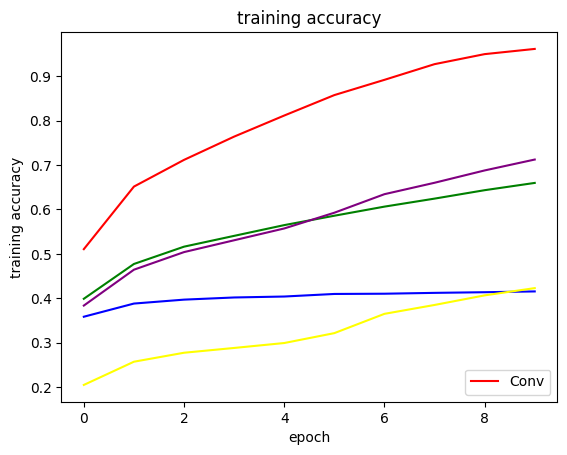

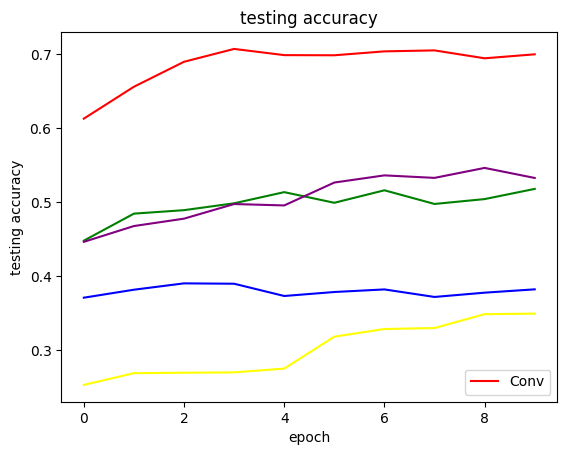

In [55]:
plt.plot(all_train_accuracies, label="CNN", color="red")
plt.plot(all_train_accuracies_layer0, label="0", color="blue")
plt.plot(all_train_accuracies_layer1, label="1",color="green")
plt.plot(all_train_accuracies_layer2, label="2",color="yellow")
plt.plot(all_train_accuracies_layer3, label="3",color="purple")
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

plt.plot(all_test_accuracies, label="CNN", color="red")
plt.plot(all_test_accuracies_layer0, label="0", color="blue")
plt.plot(all_test_accuracies_layer1, label="1", color="green")
plt.plot(all_test_accuracies_layer2, label="2", color="yellow")
plt.plot(all_test_accuracies_layer3, label="3", color="purple")
plt.title('testing accuracy')
plt.ylabel('testing accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

## **Part 2 results**

The CNN(sigmoid) model might perform differenlty from the CNN(relu) model due the chractersitics of the activitation function. Sigmoid has a smooth curve and outputs values between 1 and 0 which can be good for probability output but it can also suffer from vanishing gradients making it slower and difficult to compute.
ReLU is faster and simpiler to compute than sigmoid because it produces sparse activitation which can help to prevent overfitting and improve generalization

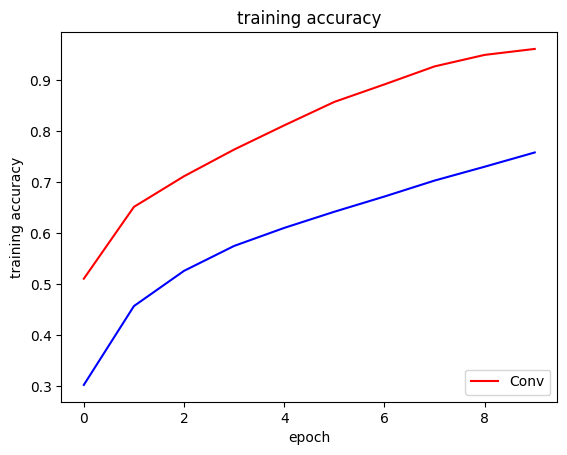

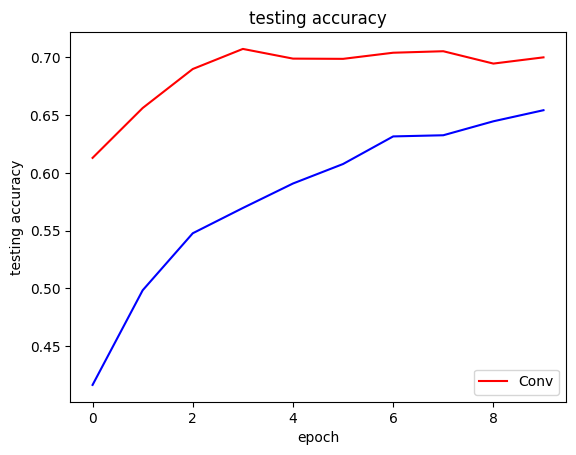

In [62]:
plt.plot(all_train_accuracies, label="ReLU", color="red")
plt.plot(all_train_accuracies_sigmoid, label="Sigmoid", color="blue")
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

plt.plot(all_test_accuracies, label="ReLU", color="red")
plt.plot(all_test_accuracies_sigmoid, label="Sigmoid", color="blue")
plt.title('testing accuracy')
plt.ylabel('testing accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

## **Part 3 results**
The dropout model might perform better due its regularization effect. The dropout can prevent overfitting by randomly dropping some of the nuerons during training which prevents them from becoming too dependent on eachother and incourage independence and rubustness.

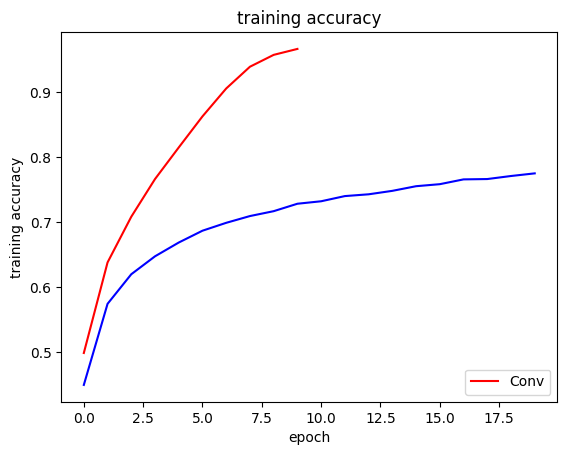

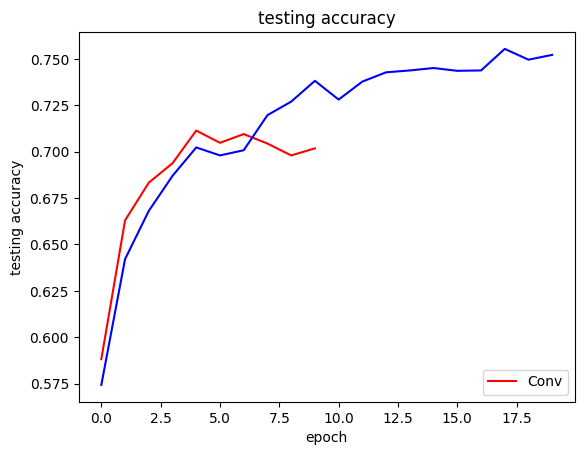

In [75]:
plt.plot(all_train_accuracies, label="Without Dropout", color="red")
plt.plot(all_train_accuracies_dropout, label="With Dropout",color="blue")
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

plt.plot(all_test_accuracies, label="Without Dropout", color="red")
plt.plot(all_test_accuracies_dropout, label="With Dropout", color="blue")
plt.title('testing accuracy')
plt.ylabel('testing accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

## **Part 4 results**

Different optimization algorithms can affect model performance in different ways. Adam is generally preferred for its adaptive learning rate and momentum, while SGD can be effective with a well-tuned learning rate and momentum. RMSprop is useful in scenarios where gradients can vary widely, and Adagrad is useful for sparse data scenarios.

Adam and Adagrad are two adaptive learning rate optimization algorithms that can perform similarly in practice, especially for deep neural networks with dense data. Adagrad adapts the learning rate of each weight by dividing the current learning rate by the square root of the sum of the squared gradients of that weight, while Adam calculates a moving average of both the first and second moments of the gradients to adapt the learning rate for each weight. Which is why they're performance is so similar.

The key difference between these RSMprop and Adagrad is the way they adapt the learning rate. RMSprop adapts the learning rate based on the recent history of gradients, while SGD simply adjusts the learning rate based on the gradient at the current iteration. Which is why the performance is so different.

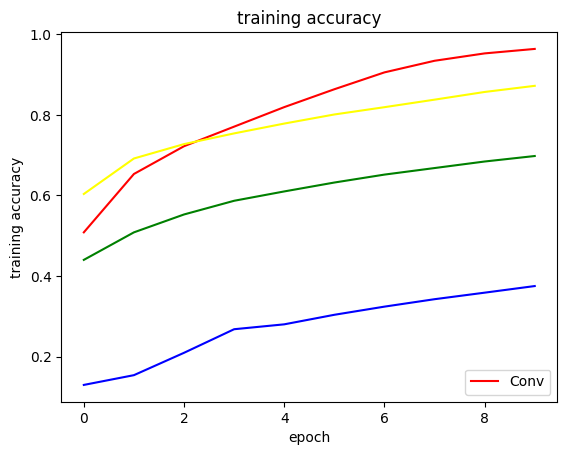

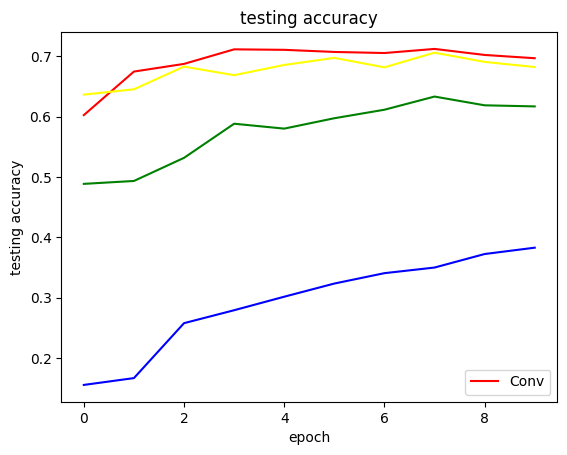

In [91]:
plt.plot(all_train_accuracies_ADAM, label="Adam", color="red")
plt.plot(all_train_accuracies_SGD, label="SGD", color="blue")
plt.plot(all_train_accuracies_RMS, label="RMSprop", color="green")
plt.plot(all_train_accuracies_ADA, label="Adagrad",color="yellow")
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

plt.plot(all_test_accuracies_ADAM, label="Adam", color="red")
plt.plot(all_test_accuracies_SGD, label="SGD", color="blue")
plt.plot(all_test_accuracies_RMS, label="RMSprop", color="green")
plt.plot(all_test_accuracies_ADA, label="Adagrad", color="yellow")
plt.title('testing accuracy')
plt.ylabel('testing accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

## **Part 5 results**

They perform fairly similar because both models have a similar depth of convolutional layers, use the same number of filters in each layer, and have similar max pooling and fully connected layers

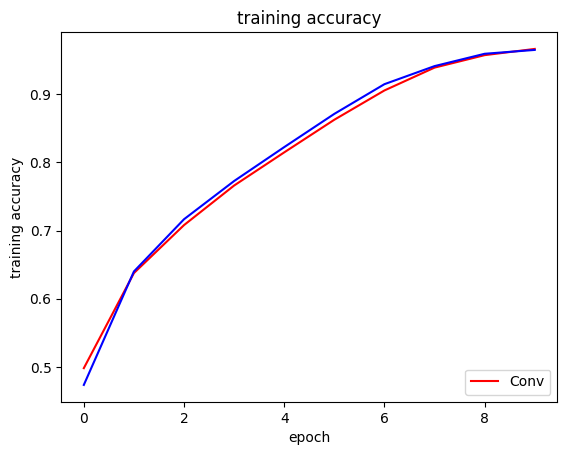

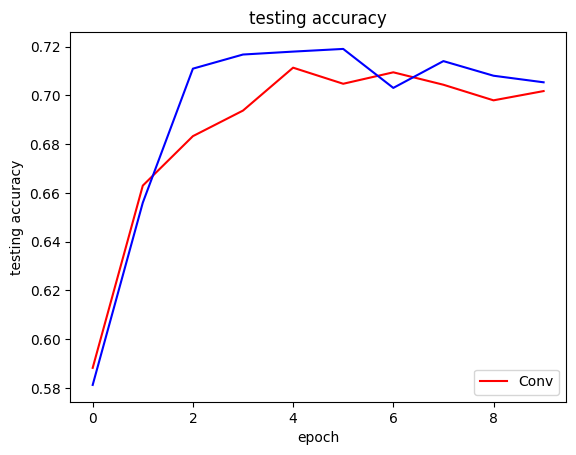

In [134]:
plt.plot(all_train_accuracies, label="5*5", color="red")
plt.plot(all_train_accuracies_3times3, label="3*3", color="blue")
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

plt.plot(all_test_accuracies, label="5*5", color="red")
plt.plot(all_test_accuracies_3times3, label="3*3", color="blue")
plt.title('testing accuracy')
plt.ylabel('testing accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='lower right')
plt.show()

## **Part 6**

We can find weights and biases for a neural network that use the sigmoid activation function to produce the same output as a neural network that uses the tanh activation function for any input x. 

By using the identity **tanh(x) = 2sigmoid(2x) - 1**, 
we can rewrite the tanh network as: 
**f(x) = W(1) [2sigmoid(2(W(2)x + b(2))) - 1] + b(1) = (2W(1))sigmoid(2(W(2)x + b(2))) + (b(1) - W(1))** 

Then, construct a new network g(x) with sigmoid activation functions that is mathematically equivalent 
to **f(x) by setting W'(1) = 2W(1), W'(2) = 2W(2), b'(1) = b(1) - W(1), and b'(2) = b(2)**

The output of g(x) is given by **g(x) = W'(1) sigmoid(W'(2) x + b'(2)) + b'(1) = 2W(1) sigmoid(2W(2) x + b(2)) + (b(1) - W(1)) = f(x)**

Therefore, the neural network g(x) with sigmoid activation functions is mathematically equivalent to the neural network f(x) with tanh activation functions and can represent the same space of functions.